#Лабораторная работа 3

Загрузим наш набор данных.

In [1]:
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [2]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

data = pd.read_csv('zoo.csv')
data = data.drop(['animal_name','class_type'], axis='columns')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   hair      101 non-null    int64
 1   feathers  101 non-null    int64
 2   eggs      101 non-null    int64
 3   milk      101 non-null    int64
 4   airborne  101 non-null    int64
 5   aquatic   101 non-null    int64
 6   predator  101 non-null    int64
 7   toothed   101 non-null    int64
 8   backbone  101 non-null    int64
 9   breathes  101 non-null    int64
 10  venomous  101 non-null    int64
 11  fins      101 non-null    int64
 12  legs      101 non-null    int64
 13  tail      101 non-null    int64
 14  domestic  101 non-null    int64
 15  catsize   101 non-null    int64
dtypes: int64(16)
memory usage: 12.8 KB


Посмотрим первые и последние 5 строк.

In [3]:
data.head(5)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [4]:
data.tail(5)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
100,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0


# Логистическая регрессия на наших данных

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = data[data.columns[1:]]
y = data['hair']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0)
model = LogisticRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

Проверим ошибку

In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('MAE train: {:.3f}, test: {:.3f}'.format(
        mean_absolute_error(y_train, y_train_pred),
        mean_absolute_error(y_test, y_test_pred)))
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))

MAE train: 0.029, test: 0.032
MSE train: 0.029, test: 0.032


# 𝐿1 -регуляризация

In [7]:
from sklearn.linear_model import Lasso

X1_train, X1_test, y1_train, y1_test = train_test_split(
    X, y, test_size=0.3, random_state=0)
lasso = Lasso(alpha=0.1)
lasso.fit(X1_train, y1_train)
y1_train_pred = lasso.predict(X1_train)
y1_test_pred = lasso.predict(X1_test)
print('Веса признаков:')
print(lasso.coef_)

print('MAE train: {:.3f}, test: {:.3f}'.format(
        mean_absolute_error(y1_train, y1_train_pred),
        mean_absolute_error(y1_test, y1_test_pred)))
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y1_train, y1_train_pred),
        mean_squared_error(y1_test, y1_test_pred)))

Веса признаков:
[-0.         -0.          0.39391749 -0.         -0.         -0.
  0.          0.          0.          0.         -0.          0.06114613
 -0.          0.          0.        ]
MAE train: 0.289, test: 0.241
MSE train: 0.099, test: 0.074


По весам признаков видно, что значащими являются 3 и 12 признаки('milk', 'legs')

# L2- регуляризация

Линейный регрессор с L2-регуляризацией реализован в классе Ridge

Устанавливаем альфа (лямбда).При больших значениях альфа модель "штрафуется", т.е. ей не разрешается делать веса слишком большими, поэтому она в таком случае недообучается или находит ошибочную закономерность 

In [8]:
from sklearn.linear_model import Ridge

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X, y, test_size=0.3, random_state=0)
ridge = Ridge(alpha=0.1)
ridge.fit(X2_train, y2_train)
y2_train_pred = ridge.predict(X2_train)
y2_test_pred = ridge.predict(X2_test)
print('Веса признаков:')
print(ridge.coef_)

print('MAE train: {:.3f}, test: {:.3f}'.format(
        mean_absolute_error(y2_train, y2_train_pred),
        mean_absolute_error(y2_test, y2_test_pred)))
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y2_train, y2_train_pred),
        mean_squared_error(y2_test, y2_test_pred)))

Веса признаков:
[-3.72249701e-02  4.61309865e-01  1.12617143e+00  2.47113329e-01
 -2.32348550e-01 -8.76665273e-02  2.63258166e-01 -3.30970498e-04
 -1.59846599e-01  3.56858072e-01 -3.34942361e-02  5.69824983e-02
 -1.36441224e-01 -3.47849188e-02  7.12381581e-02]
MAE train: 0.121, test: 0.160
MSE train: 0.029, test: 0.046


В отличие от L2-регуляризации, L1 обнуляет веса при некоторых признака (из-за ромбообразных линий уровня L1-нормы).

Посмотрим как зависят коэффициенты от параметра альфа

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.926e-01, tolerance: 1.737e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_

for alpha= [0]  lasso: [ 8.77307096e-02  6.45418963e-01  1.30961868e+00  2.25102493e-01
 -2.53068839e-01 -9.06901752e-02  3.64455510e-01 -1.02927531e-01
 -1.61450448e-01  4.15156039e-01 -1.22296625e-03  6.24124740e-02
 -1.29022422e-01 -4.60607462e-02  6.57646608e-02]
for alpha= [0]  ridge: [ 8.77307096e-02  6.45418963e-01  1.30961868e+00  2.25102493e-01
 -2.53068839e-01 -9.06901752e-02  3.64455510e-01 -1.02927531e-01
 -1.61450448e-01  4.15156039e-01 -1.22296625e-03  6.24124740e-02
 -1.29022422e-01 -4.60607462e-02  6.57646608e-02]
for alpha= [1]  lasso: [-0.         -0.          0.39391749 -0.         -0.         -0.
  0.          0.          0.          0.         -0.          0.06114613
 -0.          0.          0.        ]
for alpha= [1]  ridge: [-0.18146887  0.03322648  0.65826512  0.23748122 -0.16741229 -0.08487954
  0.1461477   0.07223029 -0.09124926  0.18321188 -0.07184214  0.04933766
 -0.12429     0.00492207  0.09276134]
for alpha= [2]  lasso: [-0.         -0.          0.       

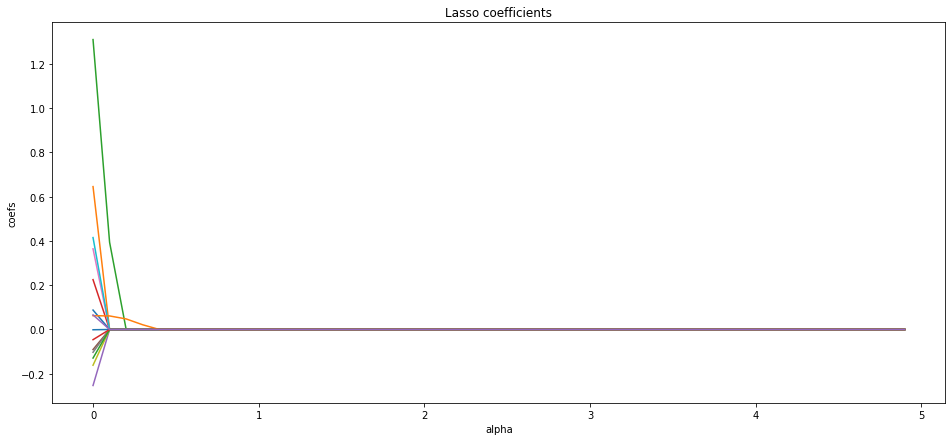

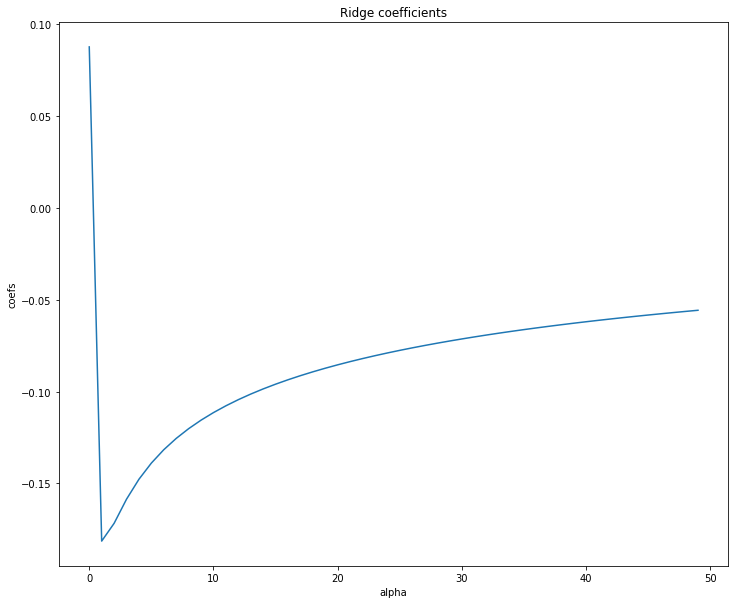

In [9]:
import matplotlib.pyplot as plt
coefsLasso = []
coefsRidge = []
# Создаздим массивы по 200 значений для коэфициентов 
alphasLasso = np.arange (0, 5, 0.1)
alphasRidge = np.arange (0, 50, 1)
for i in range(50):
    lasso = Lasso(alpha=alphasLasso[i])
    lasso.fit(X1_train, y1_train)
    coefsLasso.append(lasso.coef_)
    ridge = Ridge(alpha=alphasRidge[i])
    ridge.fit(X2_train, y2_train)
    coefsRidge.append(ridge.coef_[0])
    print('for alpha=', [i], ' lasso:', lasso.coef_)
    print('for alpha=', [i], ' ridge:', ridge.coef_)
    

# Build Lasso and Ridge coefficient plots
plt.figure(figsize = (16,7))

plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')
plt.show()

plt.plot(alphasRidge, coefsRidge)
plt.title('Ridge coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')
plt.show()

plt.show()

Для L1 регуляризации лучше всего брать С=0.01

In [10]:
from sklearn.linear_model import Lasso

X1_train, X1_test, y1_train, y1_test = train_test_split(
    X, y, test_size=0.3, random_state=0)
lasso = Lasso(alpha=0.01)
lasso.fit(X1_train, y1_train)
y1_train_pred = lasso.predict(X1_train)
y1_test_pred = lasso.predict(X1_test)
print('Веса признаков:')
print(lasso.coef_)

print('MAE train: {:.3f}, test: {:.3f}'.format(
        mean_absolute_error(y1_train, y1_train_pred),
        mean_absolute_error(y1_test, y1_test_pred)))
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y1_train, y1_train_pred),
        mean_squared_error(y1_test, y1_test_pred)))

Веса признаков:
[-0.10999841 -0.          0.73259386  0.1091088  -0.11317093 -0.05662076
  0.01490667 -0.         -0.          0.00385148 -0.          0.05408795
 -0.04544208  0.          0.        ]
MAE train: 0.144, test: 0.116
MSE train: 0.043, test: 0.027


Для L2 регуляризации лучше всего брать С=0.01 

In [11]:
from sklearn.linear_model import Ridge

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X, y, test_size=0.3, random_state=0)
ridge = Ridge(alpha=0.01)
ridge.fit(X2_train, y2_train)
y2_train_pred = ridge.predict(X2_train)
y2_test_pred = ridge.predict(X2_test)
print('Веса признаков:')
print(ridge.coef_)

print('MAE train: {:.3f}, test: {:.3f}'.format(
        mean_absolute_error(y2_train, y2_train_pred),
        mean_absolute_error(y2_test, y2_test_pred)))
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y2_train, y2_train_pred),
        mean_squared_error(y2_test, y2_test_pred)))

Веса признаков:
[ 0.07003432  0.6214928   1.28610543  0.22836252 -0.25058769 -0.09024752
  0.349943   -0.08774266 -0.16180394  0.40795767 -0.00560233  0.06168031
 -0.13029744 -0.04472175  0.06633503]
MAE train: 0.116, test: 0.169
MSE train: 0.028, test: 0.052


In [12]:
from sklearn.linear_model import Ridge

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X, y, test_size=0.3, random_state=0)
ridge = Ridge(alpha=50)
ridge.fit(X2_train, y2_train)
y2_train_pred = ridge.predict(X2_train)
y2_test_pred = ridge.predict(X2_test)
print('Веса признаков:')
print(ridge.coef_)

print('MAE train: {:.3f}, test: {:.3f}'.format(
        mean_absolute_error(y2_train, y2_train_pred),
        mean_absolute_error(y2_test, y2_test_pred)))
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y2_train, y2_train_pred),
        mean_squared_error(y2_test, y2_test_pred)))

Веса признаков:
[-0.05513119 -0.11202784  0.13677021 -0.0061304  -0.06555223 -0.03190382
  0.08113762  0.02673012  0.03559283  0.00454739 -0.01357661  0.07034441
 -0.00682961  0.02722114  0.06288602]
MAE train: 0.274, test: 0.232
MSE train: 0.095, test: 0.075
